In [1]:
!pip install keybert



     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 2.3MB 35.0MB/s 
     |████████████████████████████████| 1.2MB 48.3MB/s 
     |████████████████████████████████| 901kB 50.8MB/s 
     |████████████████████████████████| 3.3MB 36.7MB/s 
  Created wheel for keybert: filename=keybert-0.3.0-cp37-none-any.whl size=19436 sha256=02628f0cbafeff2d145c4d4da329d3235e406e43525d0dc8cd7f283684aa97ec
  Stored in directory: /root/.cache/pip/wheels/0c/ab/2b/bc129895ee956866333f364f1b3beb20efa788e074c03e6b34
  Created wheel for sentence-transformers: filename=sentence_transformers-1.2.0-cp37-none-any.whl size=123339 sha256=a2356dbfaededd40a0e6d8f2e6cda5a01be6908de9172bd7a0b2c06c46b9d4f4
  Stored in directory: /root/.cache/pip/wheels/0f/06/f7/faaa96fdda87462b4fd5c47b343340e9d5531ef70d0eef8242
Successfully built keybert sentence-transformers


In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%cd "/content/drive/My Drive/Web Mining Files"


Mounted at /content/drive
/content/drive/My Drive/Web Mining Files


In [4]:
import os
if os.path.exists('./all_songs_preprocessed.csv'):
  print('File exists!')

import pandas as pd

df2 = pd.read_csv("all_songs_after1960_preprocessed_classes.csv")

df2 = df2.loc[:, ~df2.columns.str.contains('Unnamed')]

songs = df2[['lyrics', 'year', 'sentiment_3classes']]

print (songs.head())
print (len(songs.lyrics))
print (len(songs))


File exists!
                                              lyrics  ...  sentiment_3classes
0   let's make this christmas mean something this...  ...                   0
1  come over baby whole lot of shakin' goin' on  ...  ...                   2
2  don't go over there, that vultures gonna get y...  ...                   0
3   hey, don't write yourself off yet it's only i...  ...                   2
4   cut my life into pieces, this is my last reso...  ...                   2

[5 rows x 3 columns]
24438
24438


In [5]:
from keybert import KeyBERT

kw_model = KeyBERT('distilbert-base-nli-mean-tokens')

keywords_array = []
i = 0
for song in songs["lyrics"]:
  keywords = kw_model.extract_keywords(song)
  keywords_array.append(keywords)
  if i%1000 == 0:
    print(i)
  i+=1

songs['keywords'] = keywords_array

songs.to_csv('lyrics_year_keywords.csv')



0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
songs = pd.read_csv('lyrics_year_keywords.csv')
print (songs.head())
songs = songs.loc[:, ~songs.columns.str.contains('Unnamed')]
songs.drop(columns=['keywords'])
print (songs.head())
print (keywords_array)
songs['keywords'] = keywords_array
songs['sentiment_3classes'] = df2['sentiment_3classes']
print (songs.head())

Output hidden; open in https://colab.research.google.com to view.

In [10]:
##Keywords cosine similarity value of BERT
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
  
ps = PorterStemmer()

key_dict = {}

for i in range (0, len(songs['keywords'])):
  array = songs['keywords'][i]
  for e in array:
    #print(e)
    #print(str(i) + '--------------')
    key = ps.stem(e[0])
    value = e[1]
    if (key in key_dict.keys()):
      if (value > key_dict[key][0]):
        key_dict[key][0] = value
        key_dict[key][1] = songs['year'][i]
        key_dict[key][2].append(songs['sentiment_3classes'][i])
    else:
      key_dict[key] = [value, songs['year'][i], [songs['sentiment_3classes'][i]]]

key_dict_sorted = {k: v for k, v in sorted(key_dict.items(), key=lambda item: item[1], reverse = True)}
print (key_dict)
print (key_dict_sorted)



{'christma': [0.6852, 1966.0, [0, 0, 2, 0, 0, 1, 0]], 'sing': [0.5162, 2002.0, [0, 0, 1, 1, 2]], 'year': [0.3567, 2011.0, [0, 2, 0, 0]], 'snow': [0.4084, 2009.0, [0, 1, 2, 2, 1, 0]], 'happi': [0.4987, 1971.0, [0, 1, 2, 0, 0, 0, 1]], 'chicken': [0.3805, 1964.0, [2, 2, 2, 2]], 'lotta': [0.3968, 2020.0, [2, 2, 2, 0]], 'choru': [0.6124, 1977.0, [2, 2, 0, 1, 1, 2, 0, 2]], 'babe': [0.3809, 1975.0, [2, 2, 0, 2, 0, 2, 1, 2]], 'honey': [0.3672, 2000.0, [2, 2, 2, 2, 1, 2]], 'basement': [0.2739, 2003.0, [0, 0, 1, 1, 0]], 'vultur': [0.4741, 2014.0, [0, 1, 2, 0, 2, 1]], 'bath': [0.38, 1974.0, [0, 0, 2, 0, 2, 0, 0]], 'stole': [0.2866, 2011.0, [0, 0, 2, 0, 2]], 'suck': [0.2041, 2010.0, [0, 1, 0, 2, 1]], 'better': [0.3359, 2016.0, [2, 2, 1, 1, 2]], 'heart': [0.5048, 2010.0, [2, 0, 2, 2]], 'best': [0.4503, 1994.0, [2, 2, 0, 0]], 'live': [0.3585, 1980.0, [2, 2, 0, 2]], 'buy': [0.3051, 2009.0, [2, 1]], 'mutil': [0.3179, 2005.0, [2, 0]], 'suicid': [0.4744, 2003.0, [2, 0, 1]], 'die': [0.4505, 2005.0, [2, 0

In [11]:
import numpy as np
keys_df_value = pd.DataFrame.from_dict(key_dict_sorted, orient="index", columns=['value', 'year', 'sentiment'])
print(keys_df_value.head())
keys_df_value['sentiment'] = keys_df_value['sentiment'].apply(lambda row: round(np.mean(np.array(row)), 0))
print(keys_df_value.head())
print(keys_df_value.loc['kiss'])
keys_df_value.to_csv('keywords_value.csv')

                                                     value  ...           sentiment
_examining_the_potential_for_wellbeing_and_the_...  0.8135  ...                 [2]
miss                                                0.7590  ...  [0, 0, 0, 0, 0, 0]
angel                                               0.7540  ...  [2, 1, 0, 0, 0, 1]
ecstasi                                             0.7450  ...  [2, 2, 2, 2, 0, 0]
monkey                                              0.7359  ...     [2, 1, 2, 2, 2]

[5 rows x 3 columns]
                                                     value    year  sentiment
_examining_the_potential_for_wellbeing_and_the_...  0.8135  2014.0        2.0
miss                                                0.7590  2018.0        0.0
angel                                               0.7540  2016.0        1.0
ecstasi                                             0.7450  2018.0        1.0
monkey                                              0.7359  1965.0        2.0
value 

In [12]:
##Keywords per decade count



key_dict_60 = {}
key_dict_70 = {}
key_dict_80 = {}
key_dict_90 = {}
key_dict_2000 = {}
key_dict_2010 = {}
key_dict_2020 = {}
sixties = []
seventies = []
eighties = []
nineties = []
twothousands = []
twotens = []
twotwenties = []

for i in range (0,10):
  sixties.append(1960.0 + i)
  seventies.append(1970.0 + i)
  eighties.append(1980.0 + i)
  nineties.append(1990.0 + i)
  twothousands.append(2000.0 + i)
  twotens.append(2010.0 + i)
  twotwenties.append(2020.0 + i)


for i in range (0, len(songs['keywords'])):
  array = songs['keywords'][i]
  for e in array:
    key = ps.stem(e[0])
    if songs['year'][i] in sixties:
      if (key in key_dict_60.keys()):
        key_dict_60[key][0] +=1
        key_dict_60[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_60[key] = [1, '60s', [songs['sentiment_3classes'][i]]]
    elif songs['year'][i] in seventies:
      if (key in key_dict_70.keys()):
        key_dict_70[key][0] +=1
        key_dict_70[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_70[key] = [1, '70s', [songs['sentiment_3classes'][i]]]
    elif songs['year'][i] in eighties:
      if (key in key_dict_80.keys()):
        key_dict_80[key][0] +=1
        key_dict_80[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_80[key] = [1, '80s', [songs['sentiment_3classes'][i]]]
    elif songs['year'][i] in nineties:
      if (key in key_dict_90.keys()):
        key_dict_90[key][0] +=1
        key_dict_90[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_90[key] = [1, '90s', [songs['sentiment_3classes'][i]]]
    elif songs['year'][i] in twothousands:
      if (key in key_dict_2000.keys()):
        key_dict_2000[key][0] +=1
        key_dict_2000[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_2000[key] = [1, '2000s', [songs['sentiment_3classes'][i]]]
    elif songs['year'][i] in twotens:
      if (key in key_dict_2010.keys()):
        key_dict_2010[key][0] +=1
        key_dict_2010[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_2010[key] = [1, '2010s', [songs['sentiment_3classes'][i]]]
    elif songs['year'][i] in twotwenties:
      if (key in key_dict_2020.keys()):
        key_dict_2020[key][0] +=1
        key_dict_2020[key][2].append(songs['sentiment_3classes'][i])
      else:
        key_dict_2020[key] = [1, '2020s', [songs['sentiment_3classes'][i]]]

key_dict_60_sorted = {k: v for k, v in sorted(key_dict_60.items(), key=lambda item: item[1], reverse = True)}
key_dict_70_sorted = {k: v for k, v in sorted(key_dict_70.items(), key=lambda item: item[1], reverse = True)}
key_dict_80_sorted = {k: v for k, v in sorted(key_dict_80.items(), key=lambda item: item[1], reverse = True)}
key_dict_90_sorted = {k: v for k, v in sorted(key_dict_90.items(), key=lambda item: item[1], reverse = True)}
key_dict_2000_sorted = {k: v for k, v in sorted(key_dict_2000.items(), key=lambda item: item[1], reverse = True)}
key_dict_2010_sorted = {k: v for k, v in sorted(key_dict_2010.items(), key=lambda item: item[1], reverse = True)}
key_dict_2020_sorted = {k: v for k, v in sorted(key_dict_2020.items(), key=lambda item: item[1], reverse = True)}
print (key_dict_60)
print (key_dict_60_sorted)
print (key_dict_2020_sorted)

##Count after years doesn't really make sense. One would have to count keywords in different period.



{'dream': [175, '60s', [0, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 1, 1, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 2, 2, 0, 0, 1, 1]], 'love': [542, '60s', [0, 2, 2, 2, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2, 2

In [13]:
#saving keywords per decade
keys_df_count_60 = pd.DataFrame.from_dict(key_dict_60_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_60['sentiment'] = keys_df_count_60['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_60.head())
keys_df_count_60.to_csv('keywords_count_60.csv')

keys_df_count_70 = pd.DataFrame.from_dict(key_dict_70_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_70['sentiment'] = keys_df_count_70['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_70.head())
keys_df_count_70.to_csv('keywords_count_70.csv')

keys_df_count_80 = pd.DataFrame.from_dict(key_dict_80_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_80['sentiment'] = keys_df_count_80['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_80.head())
keys_df_count_80.to_csv('keywords_count_80.csv')

keys_df_count_90 = pd.DataFrame.from_dict(key_dict_90_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_90['sentiment'] = keys_df_count_90['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_90.head())
keys_df_count_90.to_csv('keywords_count_90.csv')

keys_df_count_2000 = pd.DataFrame.from_dict(key_dict_2000_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_2000['sentiment'] = keys_df_count_2000['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_2000.head())
keys_df_count_2000.to_csv('keywords_count_2000.csv')

keys_df_count_2010 = pd.DataFrame.from_dict(key_dict_2010_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_2010['sentiment'] = keys_df_count_2010['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_2010.head())
keys_df_count_2010.to_csv('keywords_count_2010.csv')

keys_df_count_2020 = pd.DataFrame.from_dict(key_dict_2020_sorted, orient="index", columns=['count', 'year', 'sentiment'])
keys_df_count_2020['sentiment'] = keys_df_count_2020['sentiment'].apply(lambda row: np.argmax(np.bincount(np.array(row))))
print(keys_df_count_2020.head())
keys_df_count_2020.to_csv('keywords_count_2020.csv')





       count year  sentiment
love     542  60s          2
choru    433  60s          2
dream    175  60s          0
kiss     161  60s          2
girl     105  60s          2
       count year  sentiment
choru    733  70s          2
love     698  70s          2
dream    387  70s          2
night    197  70s          2
sing     149  70s          2
         count year  sentiment
love       697  80s          2
choru      686  80s          2
dream      383  80s          2
night      257  80s          2
tonight    215  80s          2
            count year  sentiment
choru         717  90s          2
love          653  90s          2
dream         359  90s          0
motherfuck    209  90s          2
kiss          193  90s          2
            count   year  sentiment
love          694  2000s          2
dream         505  2000s          0
motherfuck    249  2000s          2
die           242  2000s          0
night         242  2000s          0
         count   year  sentiment
love       70

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

##Plotting Top 7 Keywords per decade
df_1960 = keys_df_count_60[~keys_df_count_60.index.isin(['choru', 'vers'])].head(7)
df_1970 = keys_df_count_70[~keys_df_count_70.index.isin(['choru', 'vers'])].head(7)
df_1980 = keys_df_count_80[~keys_df_count_80.index.isin(['choru', 'vers'])].head(7)
df_1990 = keys_df_count_90[~keys_df_count_90.index.isin(['choru', 'vers'])].head(7)
df_2000 = keys_df_count_2000.head(7)
df_2010 = keys_df_count_2010.head(7)
df_2020 = keys_df_count_2020.head(7)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_1960.index.values, y = df_1960['count'])
plt.title('7 most frequent keywords 60s')
plt.show()
figure.savefig("plots/keywords/keywords_count_60s.png", dpi = 300)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_1970.index.values, y = df_1970['count'])
plt.title('7 most frequent keywords 70s')
plt.show()
figure.savefig("plots/keywords/keywords_count_70s.png", dpi = 300)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_1980.index.values, y = df_1980['count'])
plt.title('7 most frequent keywords 80s')
plt.show()
figure.savefig("plots/keywords/keywords_count_80s.png", dpi = 300)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_1990.index.values, y = df_1990['count'])
plt.title('7 most frequent keywords 90s')
plt.show()
figure.savefig("plots/keywords/keywords_count_90s.png", dpi = 300)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_2000.index.values, y = df_2000['count'])
plt.title('7 most frequent keywords 2000s')
plt.show()
figure.savefig("plots/keywords/keywords_count_2000s.png", dpi = 300)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_2010.index.values, y = df_2010['count'])
plt.title('7 most frequent keywords 2010s')
plt.show()
figure.savefig("plots/keywords/keywords_count_2010s.png", dpi = 300)

figure = plt.figure(figsize=(6, 3))
sns.barplot(x = df_2020.index.values, y = df_2020['count'])
plt.title('7 most frequent keywords 2020s')
plt.show()
figure.savefig("plots/keywords/keywords_count_2020s.png", dpi = 300)

NameError: ignored

In [ ]:
valence_per_year = valence.groupby('year').mean()

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

##Plotting valence over time
figure = plt.figure(figsize=(6, 3))
sns.lineplot(data = valence_per_year, x = "year", y = "valence")
plt.title('Valence over time')
plt.show()
figure.savefig("plots/valence_per_year.png", dpi = 300)

NameError: ignored

<Figure size 432x216 with 0 Axes>

   acousticness  ... sentiment_3classes
0      0.130000  ...                  0
1      0.194000  ...                  2
2      0.000369  ...                  0
3      0.037100  ...                  2
4      0.000481  ...                  2

[5 rows x 21 columns]
Index(['acousticness', 'artist', 'danceability', 'duration_ms', 'energy',
       'explicit', 'instrumentalness', 'key', 'liveness', 'loudness', 'lyrics',
       'mode', 'popularity', 'release date', 'song_title', 'speechiness',
       'tempo', 'valence', 'year', 'sentiment_2classes', 'sentiment_3classes'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


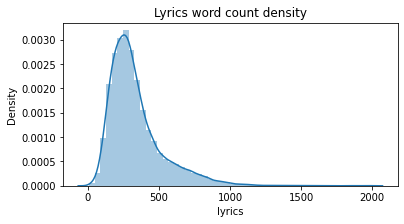

In [15]:
##Plotting word count density
lyrics_len= df2['lyrics'].apply(lambda row: len(row.split(' ')))
lyrics_len = lyrics_len[lyrics_len< 2000]

figure = plt.figure(figsize=(6, 3))
sns.distplot(lyrics_len)
plt.title('Lyrics word count density')
plt.show()
figure.savefig("plots/lyrics_text_length_densitiy.png", dpi = 300)